FINM 33165 

HW4

Moushumi Pardesi

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Create a descending sequence of alphas

In [8]:
alpha_sequence = np.linspace(1, 0, 500)

Loading an image and resizing

In [9]:
image_path = "imageForHW4.jpeg"
original_image = cv2.imread(image_path)
resized_image = cv2.resize(original_image, (600, 600))

Adding noise

In [10]:
def add_noise(image, alpha):
    
    noise = np.random.normal(0, alpha, image.shape)
    
    noisy_image = image + noise
    
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)


noisy_images = [add_noise(resized_image, alpha) for alpha in alpha_sequence]
noisy_images

[array([[[190, 115,  23],
         [190, 113,  23],
         [190, 115,  24],
         ...,
         [136,  43,  38],
         [134,  39,  39],
         [134,  38,  39]],
 
        [[190, 115,  22],
         [188, 113,  23],
         [189, 117,  24],
         ...,
         [137,  41,  40],
         [135,  37,  39],
         [132,  37,  38]],
 
        [[188, 114,  21],
         [191, 115,  21],
         [190, 116,  23],
         ...,
         [136,  40,  40],
         [134,  38,  38],
         [134,  39,  38]],
 
        ...,
 
        [[ 94,  24,  14],
         [ 92,  28,  12],
         [ 95,  27,  13],
         ...,
         [ 87,  28,  13],
         [ 86,  27,  12],
         [ 87,  28,  11]],
 
        [[ 93,  27,  14],
         [ 94,  26,  13],
         [ 94,  28,  14],
         ...,
         [ 86,  27,  11],
         [ 85,  27,  13],
         [ 86,  28,  13]],
 
        [[ 94,  25,  13],
         [ 95,  27,  14],
         [ 94,  26,  15],
         ...,
         [ 86,  28,  12],
  

Estimate z_T to white noise

In [11]:
num_samples = 100
epsilon_samples = np.random.normal(0, 1, (num_samples, resized_image.shape[0], resized_image.shape[1], resized_image.shape[2]))


Squared differences

In [12]:
squared_differences = np.mean(np.square(epsilon_samples - noisy_images[-1]), axis=(1, 2, 3))
average_squared_difference = np.mean(squared_differences)

Plot output

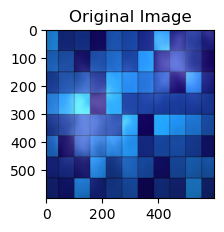

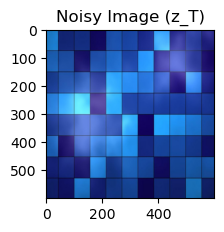

In [14]:
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.show()

plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(noisy_images[-1], cv2.COLOR_BGR2RGB))
plt.title('Noisy Image (z_T)')

plt.show()

In [15]:
print(f"Average Squared Difference: {average_squared_difference}")

Average Squared Difference: 13392.799479479492
